In [1]:
import pandas as pd

In [2]:
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(data_url, sep="\t")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


1. Вывести: кол-во наблюдений в датасете


In [3]:
df.shape[0]

4622

2. Вывести названия столбцов

In [4]:
df.columns.to_list()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

3. Определить самую частую позицию (item) в заказе

In [5]:
df.item_name.mode()[0]

'Chicken Bowl'

4. Построить гистрограмму частоты заказов по позициям (item )

Text(0.5, 0, 'item')

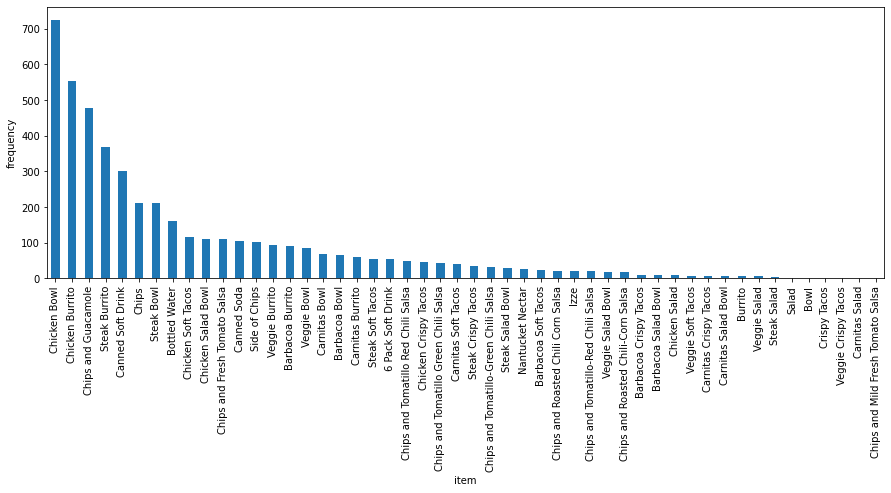

In [6]:
graph = df.item_name.value_counts().plot(kind='bar', figsize=(15, 5))
graph.set_ylabel('frequency')
graph.set_xlabel('item')

5. Измените тип переменной item_price c с помощью лямбды функции

In [7]:
df.item_price = df.item_price.apply(lambda x: float(x[1:]))

6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

Text(0.5, 0, 'item')

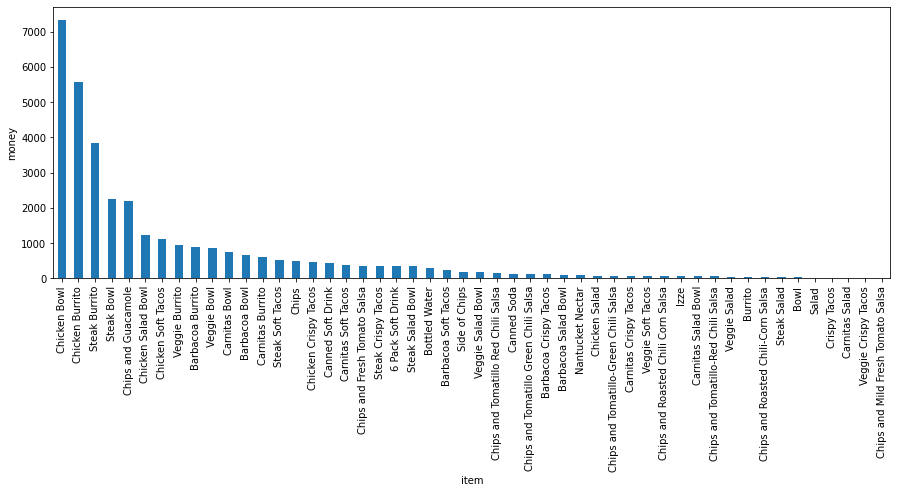

In [8]:
graph = df.groupby('item_name').sum('item_price').sort_values('item_price', ascending=False).item_price.plot(kind='bar', figsize=(15, 5))
graph.set_ylabel('money')
graph.set_xlabel('item')

7. Средняя сумма заказа? (минимум 2 способа)

In [9]:
print(round(df.groupby('order_id').item_price.sum().mean(), 2))
print(round(df.item_price.sum() / df.order_id.drop_duplicates().shape[0], 2))

18.81
18.81


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [10]:
cnts = df.groupby(['order_id'])['order_id'].count()
cnts.describe().loc[['mean', 'min', 'max', '50%']].rename({"50%": "median"}).reset_index().rename(columns={"order_id": "quantity"})

,index,quantity
0,mean,2.520174
1,min,1.000000
2,max,23.000000
3,median,2.000000


9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [11]:
steak_stat = df[df.item_name.str.contains("Steak")].groupby('item_name').agg({'item_price': 'mean', 'quantity': 'count'}).sort_values("quantity", ascending=False)
steak_stat = steak_stat.rename(columns={"quantity": "total_orders", "item_price": "average_price"})
steak_stat

,average_price,total_orders
item_name,,
Steak Burrito,10.465842,368
Steak Bowl,10.711801,211
Steak Soft Tacos,9.746364,55
Steak Crispy Tacos,10.209714,35
Steak Salad Bowl,11.847931,29
Steak Salad,8.915000,4


In [12]:
types = ["Hot", "Medium", "Mild"]
all_steaks = df[df.item_name.str.contains("Steak")]
roast_cnt = []
for typ in types:
    roast_cnt.append(all_steaks[all_steaks.choice_description.str.contains(typ)].shape[0])
types.append("None")
roast_cnt.append(all_steaks[~all_steaks.choice_description.str.contains("Mild|Medium|Hot")].shape[0])
pd.DataFrame({"Roast": types, "Quantity": roast_cnt})

,Roast,Quantity
0,Hot,82
1,Medium,114
2,Mild,105
3,None,465


10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [13]:
rub = 70
df = df.assign(item_price_rub=df.item_price * rub)

11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [14]:
scalar_df = df[~df.item_name.str.contains("and")].reset_index()
and_rows = df[df.item_name.str.contains("and")].reset_index()
and_rows.item_name = and_rows.item_name.apply(lambda x: x.split(" and "))
scalar_df = scalar_df.append(and_rows.explode("item_name"))
pd.DataFrame(scalar_df.groupby(['item_name', 'order_id']).agg({"quantity": "count"}))

quantity
item_name         order_id          
6 Pack Soft Drink 129              1
                  148              1
                  154              1
                  168              1
                  182              1
...                              ...
Veggie Soft Tacos 567              1
                  688              1
                  948              1
                  1132             1
                  1559             1

[4996 rows x 1 columns]

In [15]:
roasts = pd.DataFrame(columns=['roast', 'order_id', 'item_name'])
for typ in types[:3]:
    res = all_steaks[all_steaks.choice_description.str.contains(typ)][['item_name', 'order_id']]
    res = res.assign(roast=typ)
    roasts = roasts.append(res)
none_roast = all_steaks[~all_steaks.choice_description.str.contains("Mild|Medium|Hot")][['item_name', 'order_id']]
none_roast = none_roast.assign(roast="None")
roasts = roasts.append(none_roast)
pd.DataFrame(roasts.groupby(['roast', 'order_id', 'item_name']).agg({"item_name": "count"}))

item_name
roast order_id item_name                    
Hot   21       Steak Burrito               1
      22       Steak Burrito               1
      29       Steak Burrito               1
               Steak Soft Tacos            1
      30       Steak Burrito               1
...                                      ...
None  1810     Steak Crispy Tacos          1
      1818     Steak Salad Bowl            1
      1829     Steak Burrito               1
      1830     Steak Burrito               1
      1833     Steak Burrito               2

[717 rows x 1 columns]

12. Определить цену по каждой позиции в отдельности.

In [16]:
df.item_price = round(df.item_price / df.quantity, 2)
prices = df.groupby('item_name').agg({"item_price": lambda x: x.unique()})
prices

,item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
